# Trader Behavior vs Market Sentiment Analysis

**Prepared for:** Bajarangs / PrimeTrade.ai  
**Role Applied For:** Junior Data Scientist – Trader Behavior Insights  

This notebook analyzes the relationship between crypto trader performance and market sentiment using Bitcoin's Fear & Greed Index and historical trade data from Hyperliquid.

---


In [3]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index (1).csv
Saving historical_data.csv to historical_data.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load datasets
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')


In [5]:
# Convert date fields
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge sentiment
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], left_on='trade_date', right_on='date', how='left')
merged_df.rename(columns={'classification': 'market_sentiment'}, inplace=True)


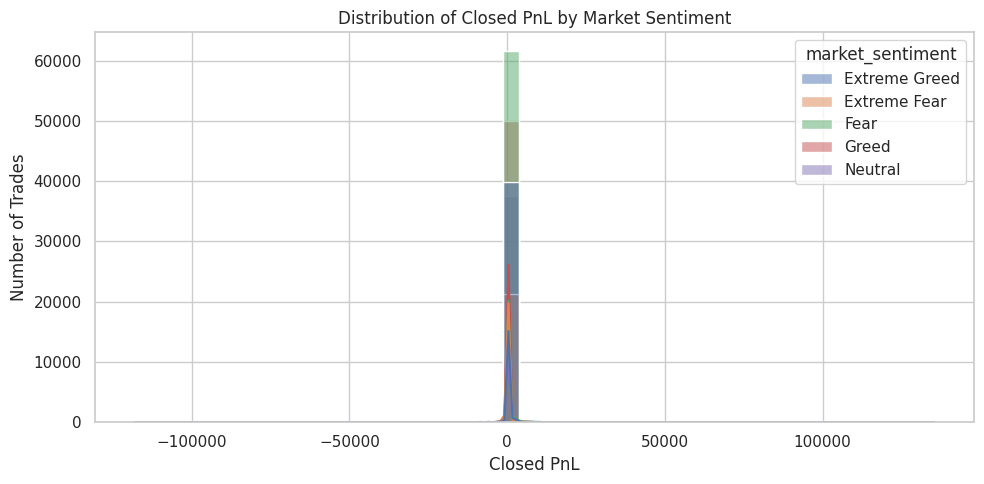

In [6]:
# Distribution Plot
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_df, x='Closed PnL', hue='market_sentiment', kde=True, bins=50)
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Closed PnL')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.show()


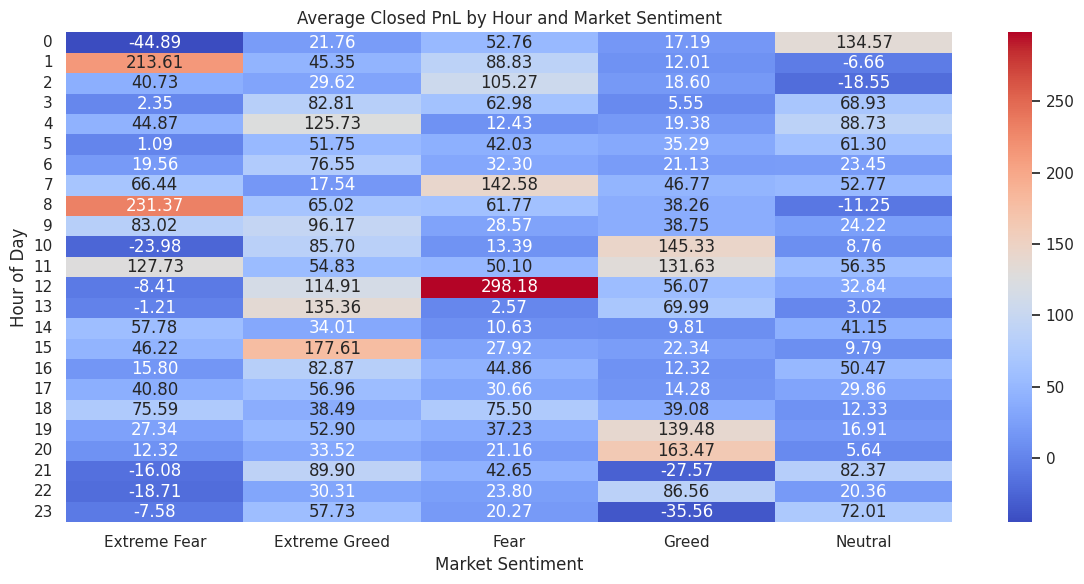

In [7]:
# Profitability Heatmap
merged_df['hour'] = pd.to_datetime(merged_df['Timestamp IST']).dt.hour
heatmap_data = merged_df.pivot_table(
    values='Closed PnL',
    index='hour',
    columns='market_sentiment',
    aggfunc='mean'
)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Average Closed PnL by Hour and Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()


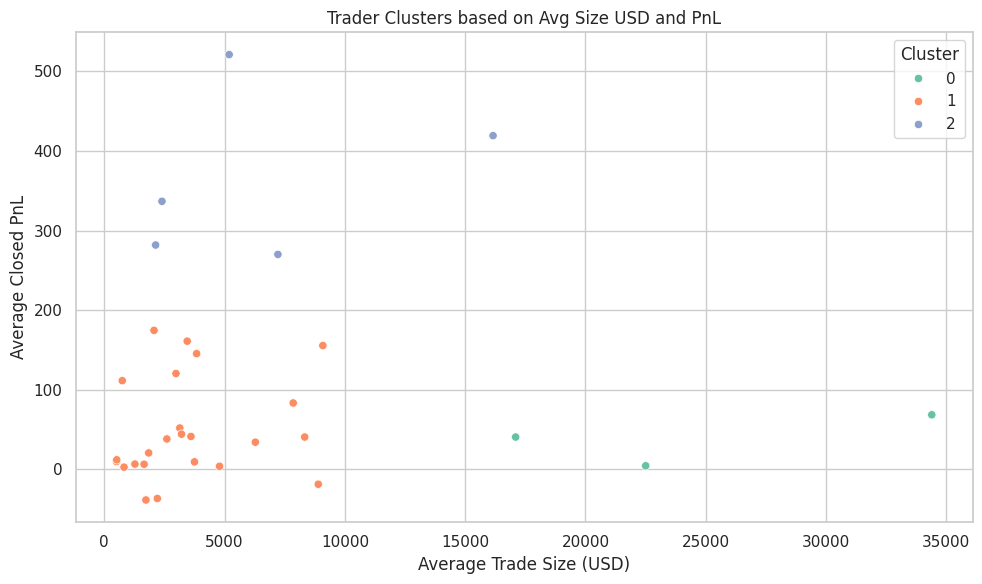

In [8]:
# Trader Clustering
df = merged_df.copy()
df['Direction'] = df['Direction'].str.lower()
trader_stats = df.groupby('Account').agg({
    'Closed PnL': 'mean',
    'Fee': 'sum',
    'Size USD': 'mean'
}).dropna()
scaler = StandardScaler()
scaled = scaler.fit_transform(trader_stats)
kmeans = KMeans(n_clusters=3, random_state=42)
trader_stats['Cluster'] = kmeans.fit_predict(scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trader_stats, x='Size USD', y='Closed PnL', hue='Cluster', palette='Set2')
plt.title('Trader Clusters based on Avg Size USD and PnL')
plt.xlabel('Average Trade Size (USD)')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()
